In [10]:
from sklearn.datasets import load_sample_image 
import numpy as np
import matplotlib.pyplot as plt


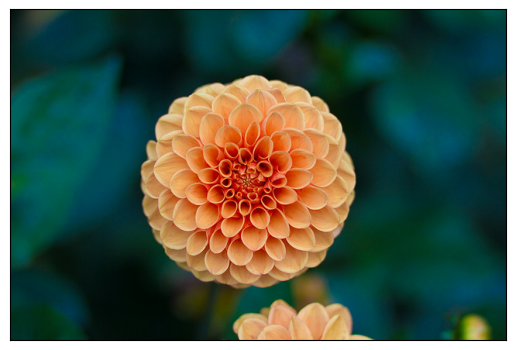

In [9]:
china = load_sample_image ("flower.jpg")
ax = plt.axes(xticks=[], yticks=[])
'''
xticks=[] and yticks=[]:These parameters remove the tick marks and labels on the x-axis and y-axis.
By passing empty lists ([]), the axis ticks
'''
ax.imshow(china);

In [3]:
china.shape

(427, 640, 3)

In [5]:
data = china /255.0 #use 0...1 scale
data = data.reshape(427 * 640,3)
data.shape

(273280, 3)

In [16]:
def plot_pixels(data, title, colors=None, N=10000): #N: Number of points to sample for visualization (default: 10,000)
    if colors is None: #If no colors argument is provided, the data is used to color the points
        colors = data
    # choose a random subset
    '''
    np.random.RandomState(0) initializes a random number generator with a fixed seed (0) for reproducibility.
    permutation(data.shape[0]) shuffles the indices of the data.
    [N] extracts a subset of N random indices from the shuffled indices.
    '''
    rng = np.random.RandomState(0)
    i = rng.permutation(data.shape[0])[:N]  # Fixing sampling
    colors = colors[i]
    R, G, B = data[i].T #data[i].T transposes the sampled data so that R, G, and B components can be extracted separatelys
    
    fig, ax = plt.subplots(1, 2, figsize=(16, 6))
    ax[0].scatter(R, G, color=colors, marker='.')
    ax[0].set(xlabel='Red', ylabel='Green', xlim=(0, 1), ylim=(0, 1))
    ax[1].scatter(R, B, color=colors, marker='.')
    ax[1].set(xlabel='Red', ylabel='Blue', xlim=(0, 1), ylim=(0, 1))
    fig.suptitle(title, size=20)

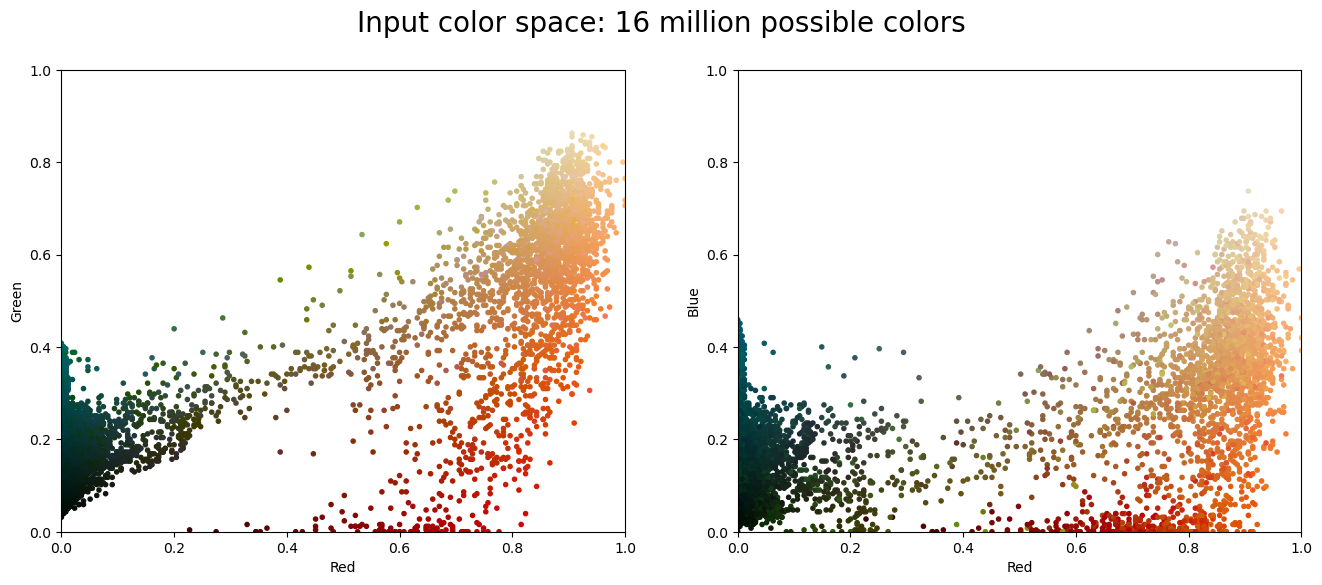

In [17]:
plot_pixels(data, title= 'Input color space: 16 million possible colors')

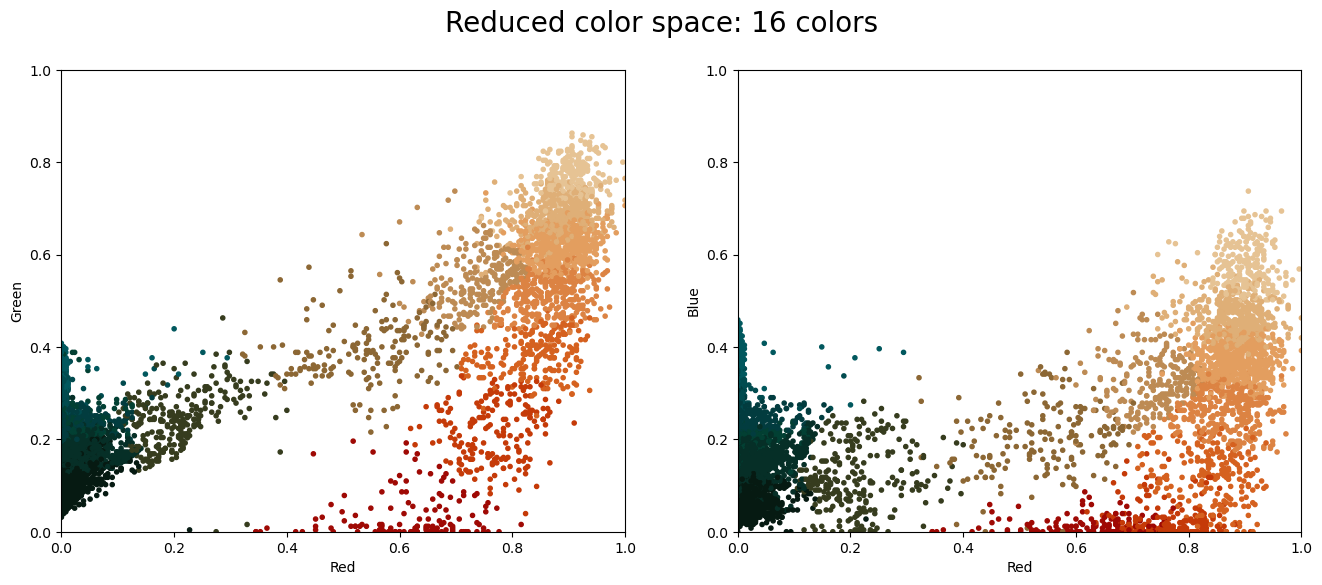

In [18]:
import warnings; warnings.simplefilter('ignore') # suppresses non-critical warnings, such as NumPy deprecation warnings, for cleaner output.
'''
MiniBatchKMeans: A faster, memory-efficient version of the KMeans algorithm.
It uses small random subsets (mini-batches) of the data to compute the centroids, 
making it suitable for large datasets (like image data).
16: The number of clusters (i.e., the reduced color space will have 16 unique co
'''
from sklearn.cluster import MiniBatchKMeans
kmeans = MiniBatchKMeans(16)
kmeans.fit(data)
new_colors=kmeans.cluster_centers_[kmeans.predict(data)]
plot_pixels (data, colors=new_colors,title="Reduced color space: 16 colors")

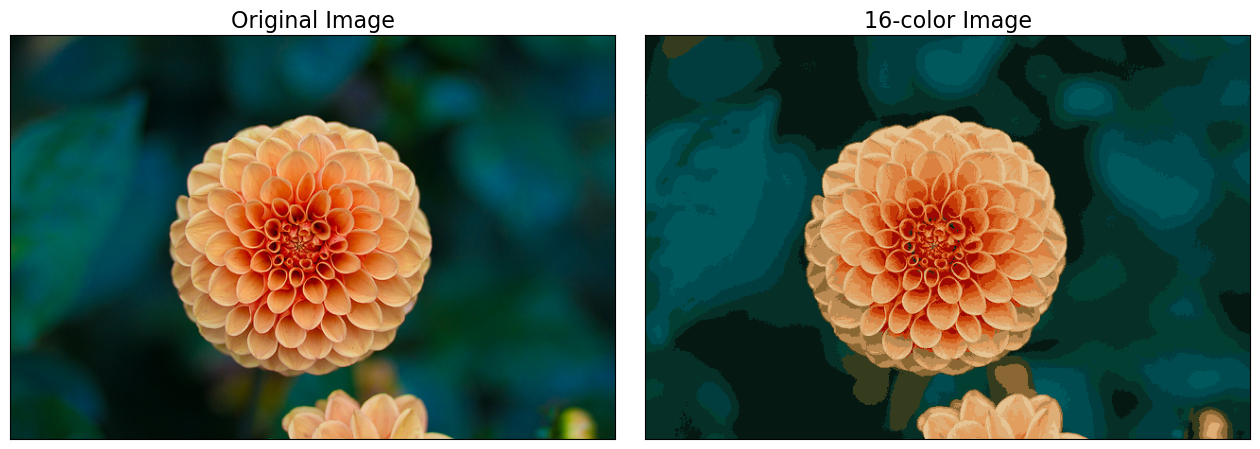

In [19]:

china_recolored = new_colors.reshape(china.shape)
fig, ax = plt.subplots(1, 2, figsize=(16, 6),subplot_kw=dict(xticks=[], yticks=[]))

fig.subplots_adjust(wspace=0.05)#wspace=0.05: Sets minimal horizontal spacing between the two subplots for a tight layout.
ax[0].imshow(china)
ax[0].set_title('Original Image', size=16)
ax[1].imshow(china_recolored)
ax[1].set_title('16-color Image', size=16);